# Assignment 6 Clustering


## Learning Objectives

* Identify clustering learning algorithms
* Identify what is K-means clustering and how it works
* Apply K-means to build data models
* Analyze and communicate analysis results by applying K-means to learn from data



# Code you need to use in this assignment

In this assignment, you are expected to pratice K-means method to analyze and group data points.  Below I copy functions and class definitions that are similar or identical to the code we covered in lecture so that you can use them in this assignment.  You are allowed to slightly update the code.  **You are required to use K-means algorithm based on the provided code as we learned in the lectures. If you use any other libries, your solutions will not get any points.** Feel free to use any other code from lecture.  

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def minkowskiDist(v1, v2, p):
    #Assumes v1 and v2 are equal length arrays of numbers
    dist = 0
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**p
    return dist**(1/p)

In [13]:
class Example(object):

    def __init__(self, f1, f2, label = 0):
        #Assumes features is an array of floats
        self.f1 = f1
        self.f2 = f2
        self.features = [f1, f2]
        self.label = label

    def dimensionality(self):
        return len(self.features)

    def getFeatures(self):
        return self.features[:]

    def getLabel(self):
        return self.label

    def setLabel(self, label):
        self.label = label


    def distance(self, other):
        return minkowskiDist(self.features, other.getFeatures(), 1)
        #return minkowskiDist(self.features, other.getFeatures(), 2)

    def __str__(self):
        return str(self.features) + ':'\
               + str(self.label)

In [14]:


class Cluster(object):

    def __init__(self, examples):
        """Assumes examples a non-empty list of Examples"""
        self.examples = examples
        self.centroid = self.computeCentroid()

    def update(self, examples):
        """Assume examples is a non-empty list of Examples
           Replace examples; return amount centroid has changed"""
        oldCentroid = self.centroid
        self.examples = examples
        self.centroid = self.computeCentroid()
        return oldCentroid.distance(self.centroid)

    def computeCentroid(self):
        vals = np.array([0.0]*self.examples[0].dimensionality())
        for e in self.examples: #compute mean
            vals += e.getFeatures()
        centroid = Example(vals[0]/len(self.examples), vals[1]/len(self.examples))
        return centroid

    def getCentroid(self):
        return self.centroid

    def variability(self):
        totDist = 0
        for e in self.examples:
            totDist += (e.distance(self.centroid))**2
        return totDist

    def members(self):
        for e in self.examples:
            yield e

    def __str__(self):
        locs = []
        for e in self.examples:
            locs.append(e.getFeatures())
        return str(locs)


In [15]:
def kmeans(examples, k, verbose = False):
    #Get k randomly chosen initial centroids, create cluster for each
    initialCentroids = random.sample(examples, k)
    clusters = []
    for e in initialCentroids:
        clusters.append(Cluster([e]))

    #Iterate until centroids do not change
    converged = False
    numIterations = 0
    while not converged:
        numIterations += 1
        #Create a list containing k distinct empty lists
        newClusters = []
        for i in range(k):
            newClusters.append([])

        #Associate each example with closest centroid
        for e in examples:
            #Find the centroid closest to e
            smallestDistance = e.distance(clusters[0].getCentroid())
            index = 0
            for i in range(1, k):
                distance = e.distance(clusters[i].getCentroid())
                if distance < smallestDistance:
                    smallestDistance = distance
                    index = i
            #Add e to the list of examples for appropriate cluster
            newClusters[index].append(e)

        for c in newClusters: #Avoid having empty clusters
            if len(c) == 0:
                raise ValueError('Empty Cluster')

        #Update each cluster; check if a centroid has changed
        converged = True
        for i in range(k):
            if clusters[i].update(newClusters[i]) > 0.0:
                converged = False
        if verbose:
            print('Iteration #' + str(numIterations))
            for c in clusters:
                print(c)
            print('') #add blank line

    return clusters


# Meet-ups

Assume that we want to celebrate our accomplishments on data analysis and visualization.  In the following **three** problems, you need to organize several in-person meet-ups for your hometown classmates.   You know the locations of all your local classmates, which are specified as a list of inner lists in the below code cell.  Each inner list is a pair as

$[x,y]$

where $x$ stands for the number of blocks east of your home city center and $y$ stands for the number of blocks north of the city center.

That is, if x = -14, the location is located 14 blocks west of the home city; if y = 13, the location is located 13 blocks north of the home city.  If [x,y] is [-14, -5], which is the first location on the below list, it means the location is 14 blocks west and 5 blocks south of the home city center.    

You need to group the local classmates appropriately and choose meet-up locations for everyone to attend conveniently.

In [16]:
#do not change the blow statement
inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]


## Problem 1: Plotting the Locations

For this problem, you need to plot the locations of your local classmates so that your classmates' locations could be visualized easily.   

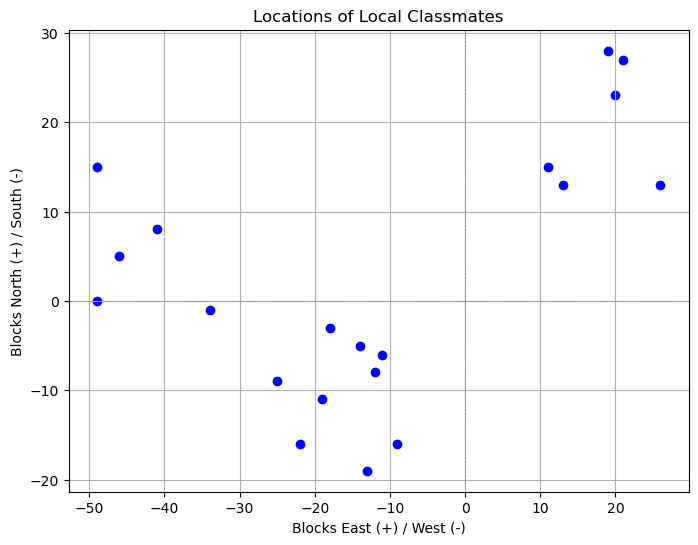

In [17]:
# Provided input data (DO NOT CHANGE)
inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],
          [-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],
          [-41,8],[-11,-6],[-25,-9],[-18,-3]]

# Unpack x and y coordinates for plotting
xs = [loc[0] for loc in inputs]
ys = [loc[1] for loc in inputs]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, color='blue', marker='o')

# Add axes lines for city center (0, 0)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

# Add labels and title
plt.xlabel('Blocks East (+) / West (-)')
plt.ylabel('Blocks North (+) / South (-)')
plt.title('Locations of Local Classmates')
plt.grid(True)
plt.show()


## Problem 2: Clustering the Locations Using K-means
Imagine first we have enough budget for **three** meet-ups. You need to address below:
* Plot your clusters for the three meet-ups using different colors.
* What locations would you choose for the meet-ups? You can either write down the locations based on your calculation or plot the locations with explanation.

Later, assume that we are informed we only have enough budget for two meet-ups.  You need to create **two** clusters. You need to address below:
* Plot the two clusters again using different colors.  
* What locations would you choose for the meet-ups? You can either write down the locations based on your calculation or plot the locations with explanation.


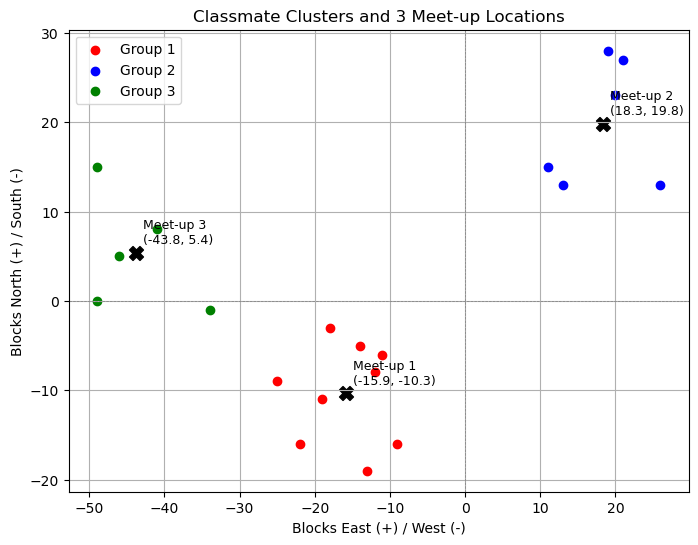

Three meet-up locations (centroids):
Meet-up 1: (-15.89, -10.33)
Meet-up 2: (18.33, 19.83)
Meet-up 3: (-43.8, 5.4)


In [18]:
# Step 1: Convert input data to Example objects
examples = [Example(x, y) for x, y in inputs]

# Step 2: Cluster into 3 groups
clusters_3 = kmeans(examples, k=3, verbose=False)

# Step 3: Plot the 3 clusters
colors = ['red', 'blue', 'green']
plt.figure(figsize=(8, 6))

for i, cluster in enumerate(clusters_3):
    xs, ys = [], []
    for e in cluster.members():
        f1, f2 = e.getFeatures()
        xs.append(f1)
        ys.append(f2)
    plt.scatter(xs, ys, color=colors[i], label=f'Group {i+1}')
    
    # Plot centroid (meet-up location)
    cx, cy = cluster.getCentroid().getFeatures()
    plt.scatter(cx, cy, color='black', marker='X', s=100)
    plt.text(cx+1, cy+1, f'Meet-up {i+1}\n({round(cx,1)}, {round(cy,1)})', fontsize=9)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Blocks East (+) / West (-)')
plt.ylabel('Blocks North (+) / South (-)')
plt.title('Classmate Clusters and 3 Meet-up Locations')
plt.legend()
plt.grid(True)
plt.show()

# Print the meetup locations
print("Three meet-up locations (centroids):")
for i, cluster in enumerate(clusters_3):
    c = cluster.getCentroid()
    print(f"Meet-up {i+1}: ({round(c.f1, 2)}, {round(c.f2, 2)})")


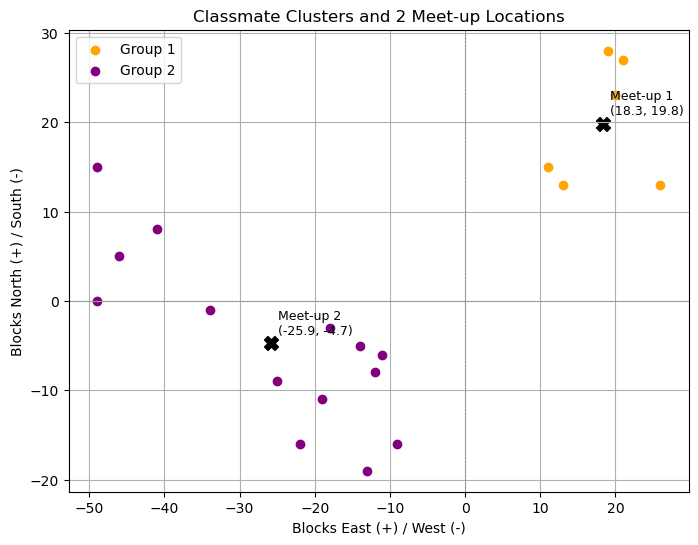

Two meet-up locations (centroids):
Meet-up 1: (18.33, 19.83)
Meet-up 2: (-25.86, -4.71)


In [19]:
# Step 1: Cluster into 2 groups
clusters_2 = kmeans(examples, k=2, verbose=False)

# Step 2: Plot the 2 clusters
colors = ['orange', 'purple']
plt.figure(figsize=(8, 6))

for i, cluster in enumerate(clusters_2):
    xs, ys = [], []
    for e in cluster.members():
        f1, f2 = e.getFeatures()
        xs.append(f1)
        ys.append(f2)
    plt.scatter(xs, ys, color=colors[i], label=f'Group {i+1}')
    
    # Plot centroid (meet-up location)
    cx, cy = cluster.getCentroid().getFeatures()
    plt.scatter(cx, cy, color='black', marker='X', s=100)
    plt.text(cx+1, cy+1, f'Meet-up {i+1}\n({round(cx,1)}, {round(cy,1)})', fontsize=9)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Blocks East (+) / West (-)')
plt.ylabel('Blocks North (+) / South (-)')
plt.title('Classmate Clusters and 2 Meet-up Locations')
plt.legend()
plt.grid(True)
plt.show()

# Print the meetup locations
print("Two meet-up locations (centroids):")
for i, cluster in enumerate(clusters_2):
    c = cluster.getCentroid()
    print(f"Meet-up {i+1}: ({round(c.f1, 2)}, {round(c.f2, 2)})")


## Problem 3: Writeup

Answer the following question to evaluate the two results (3-clusters vs. 2-clusters).  

* How do you compare the two results? Which one is better?  And why?

You can make your arguments based on dissimilarities and the problem context.


### Evaluating 3 Clusters vs. 2 Clusters

**Comparison of the Two Results**

1. Group separation:

- With 3 clusters, the classmates are divided into smaller, more localized groups. This makes each group's meetup location more convenient.
- With 2 clusters, some classmates who live far apart are grouped together, which increases travel distances within groups.

2. Dissimilarity:

- 3 clusters reduce the distance between classmates in each group, leading to more balanced and fair meetup spots.
- 2 clusters increase the variation within groups, making some meetups less practical.

3. Real-world context:

- Since this is about organizing in-person meetups, it makes sense to reduce travel for everyone.
- 3 clusters allow each group to meet closer to home, improving attendance and convenience.

**Conclusion**

The 3-cluster option is better because it creates more balanced groups and more reasonable meetup locations. It reduces travel and works better for this real-world scenario.


# Group Customers
In the following three problems, you need to group customers using K-means based on their shopping features.   The data file (*shoppingdata.csv*) of this part of the assignment can be downloaded from D2L site with this assignment specification. You should explore the data in the file first before your approach the below problems. The dataset has five columns including *Annual Income* and *Spending Score*. In this assignment, you are quired to retrieve the last **two** of these five columns. You need to make use of the *Annual Income* (in thousands of dollars) and *Spending Score* (1-100) columns to build your data examples. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.


In [20]:
import pandas as pd

df = pd.read_csv('shoppingdata.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
data = df.iloc[:, -2:].values 

print(data[:5])


[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


## Problem 4: Plotting the Customers
For this problem, you need to plot the customers so that their *spending scores* and *annual incomes* could be visualized easily.  Note that you only need to visualize the customers' *spending scores* and *annual incomes* in the plot.  


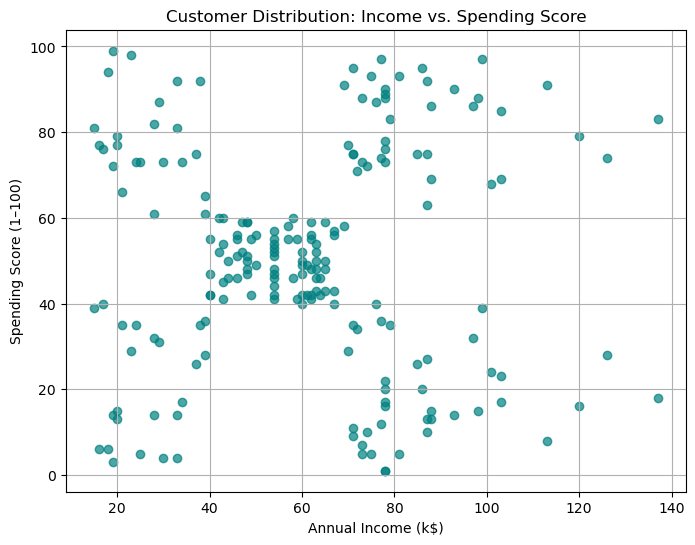

In [25]:
# Load data
df = pd.read_csv('shoppingdata.csv')

# Extract last two columns: Annual Income and Spending Score
data = df.iloc[:, -2:].values

# Split for plotting
annual_income = data[:, 0]
spending_score = data[:, 1]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(annual_income, spending_score, color='teal', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.title('Customer Distribution: Income vs. Spending Score')
plt.grid(True)
plt.show()


## Problem 5: Clustering the Customers

Cluster the customers into different groups using the K-means clustering algorithm.  You need to decide what **k** value you would like to use in your final clustering result. Your problem solution's output needs to display the resulted clusters, each of which groups customers represented using their *spending scores* and *annual incomes*. Each cluster should have a different color from other groups to represent its customers.   



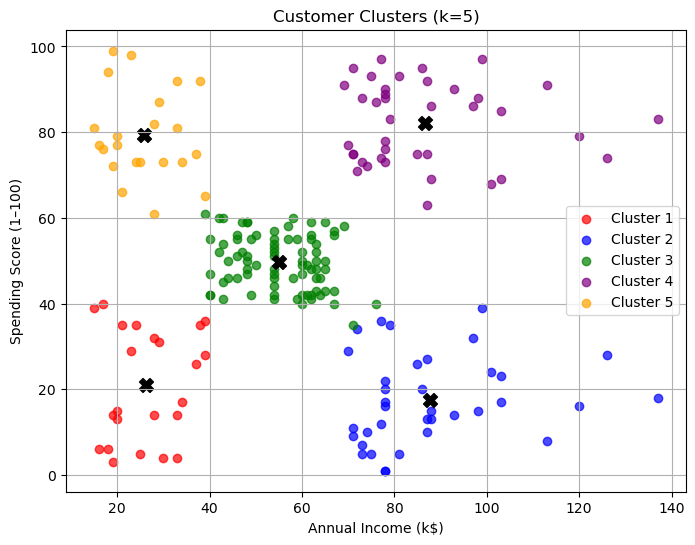

In [26]:
# Convert to Example objects
examples = [Example(row[0], row[1]) for row in data]

# Choose the number of clusters
k = 5
clusters = kmeans(examples, k=k, verbose=False)

# Plotting clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta']

plt.figure(figsize=(8, 6))
for i, cluster in enumerate(clusters):
    xs, ys = [], []
    for e in cluster.members():
        f1, f2 = e.getFeatures()
        xs.append(f1)
        ys.append(f2)
    plt.scatter(xs, ys, color=colors[i % len(colors)], label=f'Cluster {i+1}', alpha=0.7)
    
    cx, cy = cluster.getCentroid().getFeatures()
    plt.scatter(cx, cy, color='black', marker='X', s=100)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.title(f'Customer Clusters (k={k})')
plt.legend()
plt.grid(True)
plt.show()


## Problem 6: Writeup
For this problem solving, you need to reflect on your findings based on the analysis you did earlier when solving the other problems (e.g. problems 4 and 5).
* How did you choose your **k** value in your final result?  
* And how do you evaluate your final result?  




### K-Means Clustering Results

**How did you choose your k value in your final result?**

To choose the value of `k`, I experimented with several options such as `k = 3`, `4`, and `5`. I visualized the resulting clusters in each case to observe how well the customers were grouped based on their Annual Income and Spending Score. I selected `k = 5` for the final result because it provided clearly separated and meaningful clusters. The 5-cluster solution captured distinct spending patterns across different income levels (e.g., high income & high spending, low income & high spending, etc.).

**How do you evaluate your final result?**

The final clustering result with `k = 5` visually shows that the customers are grouped in a way that makes practical sense. Each cluster contains customers with similar shopping behaviors, and the centroids (cluster centers) represent reasonable meet-up or marketing strategy targets. The clusters are compact, well-separated, and reveal useful insights about spending tendencies relative to income, which aligns with real-world segmentation goals.


## Problem 7: Reflection
After you finish approaching the above problems, you also need to reflect on the learning process.  Below are the questions you need to address in your reflection.  
* What strategies did you use to solve the problems?
* What were the most challenging aspects of this assignment? How did you overcome these challenges? If you couldn’t fully overcome them, what steps did you take to try?
* What are the key takeaways or lessons you learned from this assignment? How do you think the skills and concepts in this assignment might apply to real-world situations or future projects?


**What strategies did you use to solve the problems?**

To solve the problems, I followed a step-by-step approach: first, I visualized the raw data to understand the distribution of customers or classmate locations. Then, I implemented the K-means clustering algorithm using the provided class structures (`Example`, `Cluster`, and `kmeans`). I used visualization extensively to interpret the results and ensure clusters made sense geographically or behaviorally. I also experimented with different `k` values to find the most meaningful groupings.

**What were the most challenging aspects of this assignment? How did you overcome these challenges?**

The most challenging part was making sure the K-means clustering algorithm was implemented correctly using only the provided classes, without relying on external libraries. Debugging logic in clustering and centroid updates required close attention to detail. Visualizing the results also helped validate whether the clusters were behaving as expected. When I wasn’t sure about the best value for `k`, I tested several options and used visual evaluation to decide.

**What are the key takeaways or lessons you learned from this assignment?**

- K-means clustering is a powerful and flexible technique for unsupervised learning.
- Visualization is essential for interpreting clustering results.
- Choosing the right number of clusters (`k`) often requires exploration and domain context.
- Working through algorithm logic manually deepened my understanding of how clustering actually works behind the scenes.

**How do you think the skills and concepts in this assignment might apply to real-world situations or future projects?**

These skills apply directly to real-world tasks like customer segmentation, location-based grouping, and market analysis. Understanding how to group data without labels is useful in many fields, including business, marketing, logistics, and urban planning. This project also reinforced the importance of data visualization, reproducibility, and clear interpretation, all of which are key in data-driven decision-making.


# Turn-in

Turn in your notebook including your Python code,  answers and reflections to the questions to D2L Assignments folder <b>Assignment 6</b>. Note that for your code cells in your document, you need to run them and save the output in your submitted notebook document.  